In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/blinkit_data.csv')

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':'Low Fat'})

In [13]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [17]:
df['Sales'].sum()

np.float64(1201681.4808)

In [18]:
df['Sales'].mean()

np.float64(140.9927819781767)

In [19]:
df['Sales'].count(

)

np.int64(8523)

In [20]:
df['Rating'].mean()

np.float64(3.965857092573038)

In [21]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

/tmp/ipython-input-2225921276.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,x='Item Fat Content',y='Sales',palette='Set3')


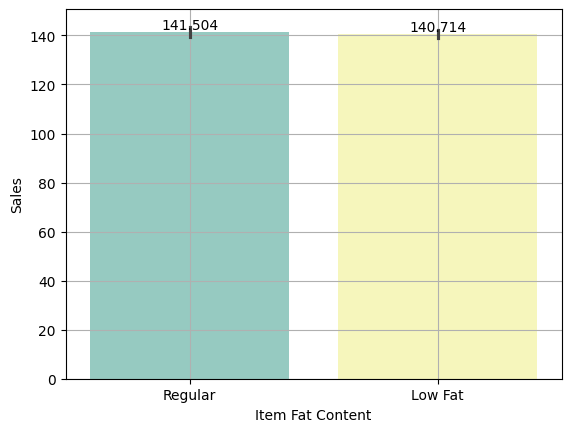

In [25]:
ax=sns.barplot(data=df,x='Item Fat Content',y='Sales',palette='Set3')
plt.grid()
for i in ax.containers:
  ax.bar_label(i)
plt.show()

([<matplotlib.patches.Wedge at 0x7d1d4867a2d0>,
 [Text(-0.48712027526941815, 0.9862625600829865, 'Low Fat'),
  Text(0.48712012634790924, -0.9862626336360905, 'Regular')],
 [Text(-0.2657019683287735, 0.5379613964089016, '64.6%'),
  Text(0.26570188709885956, -0.5379614365287766, '35.4%')])

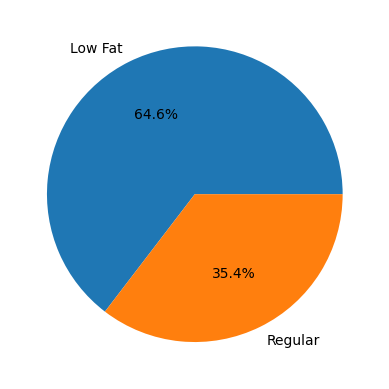

In [28]:
sales_cat=df.groupby('Item Fat Content')['Sales'].sum().reset_index()
plt.pie(sales_cat['Sales'],labels=sales_cat['Item Fat Content'],autopct='%1.1f%%')

In [29]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

/tmp/ipython-input-275004965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_total, x='Item Type', y='Sales', palette='Set3')


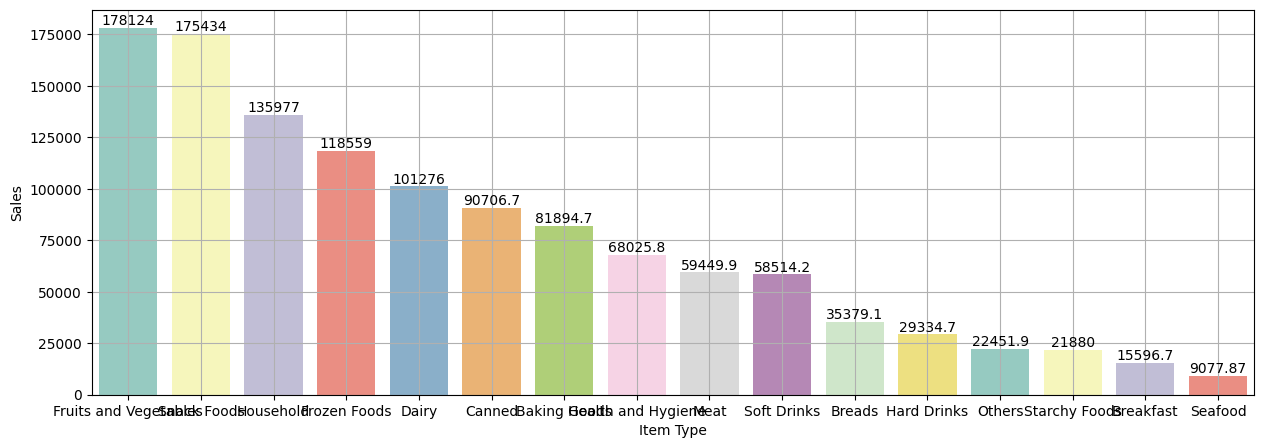

In [36]:

# Sum sales by Item Type
df_total = df.groupby('Item Type', as_index=False)['Sales'].sum()

# Sort ascending
df_total = df_total.sort_values('Sales', ascending=False)

plt.figure(figsize=(15,5))
ax = sns.barplot(data=df_total, x='Item Type', y='Sales', palette='Set3')
plt.grid()

# Add bar labels
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [37]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

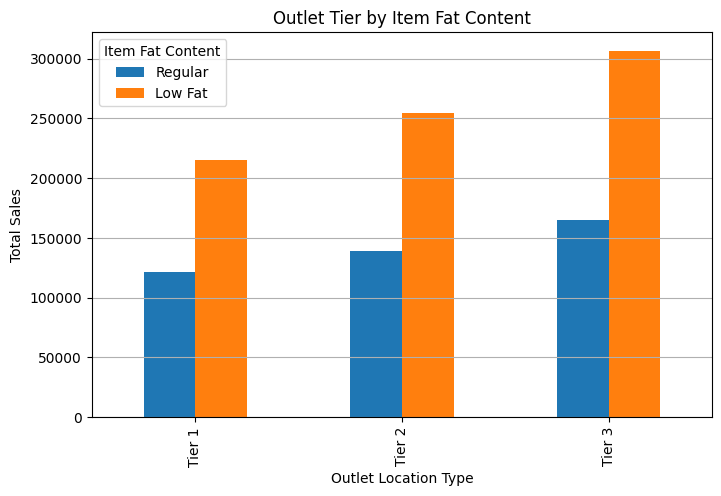

In [39]:
# Group and sum sales by Outlet Location Type and Item Fat Content
gr = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()

# Keep only 'Regular' and 'Low Fat' columns
gr = gr[['Regular', 'Low Fat']]

# Plot
ax = gr.plot(kind='bar', figsize=(8,5), title="Outlet Tier by Item Fat Content")
plt.ylabel('Total Sales')
plt.xlabel('Outlet Location Type')
plt.grid(axis='y')
plt.show()


In [40]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

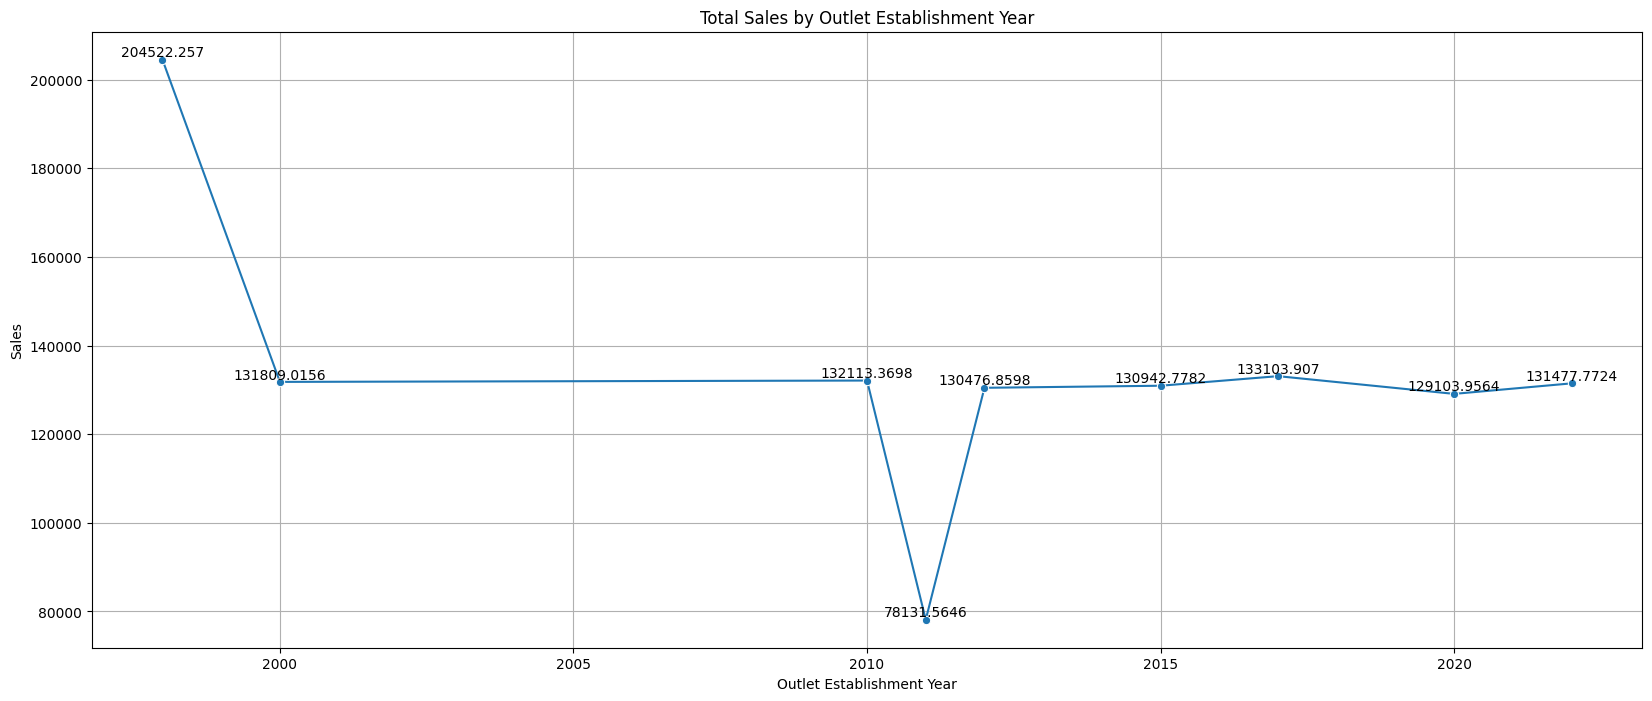

In [46]:
df_year = df.groupby('Outlet Establishment Year', as_index=False)['Sales'].sum()
plt.figure(figsize=(20,8))
# Plot line
ax = sns.lineplot(data=df_year, x='Outlet Establishment Year', y='Sales', marker='o')
plt.title("Total Sales by Outlet Establishment Year")
plt.grid(True)

# Optional: add labels on the line points
for x, y in zip(df_year['Outlet Establishment Year'], df_year['Sales']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

In [47]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7d1d449d0050>,
 [Text(0.8750618169957071, 0.6665334323469243, 'High'),
  Text(-0.9590008647047338, 0.5388110443333293, 'Medium'),
  Text(0.4364088728290166, -1.0097263469456006, 'Small')],
 [Text(0.47730644563402197, 0.3635636903710496, '20.7%'),
  Text(-0.5230913807480365, 0.29389693327272504, '42.3%'),
  Text(0.23804120336128173, -0.5507598256066911, '37.0%')])

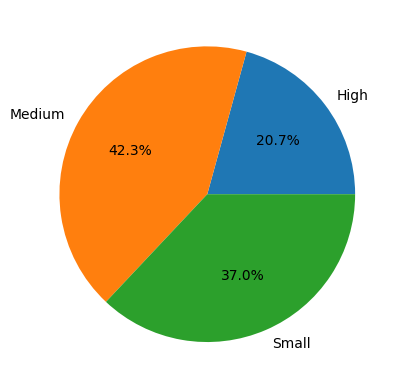

In [48]:
gf=df.groupby('Outlet Size')['Sales'].sum().reset_index()
plt.pie(gf['Sales'],labels=gf['Outlet Size'],autopct='%1.1f%%')

/tmp/ipython-input-65722050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=gf,y='Outlet Location Type',x='Sales',palette='Set3')


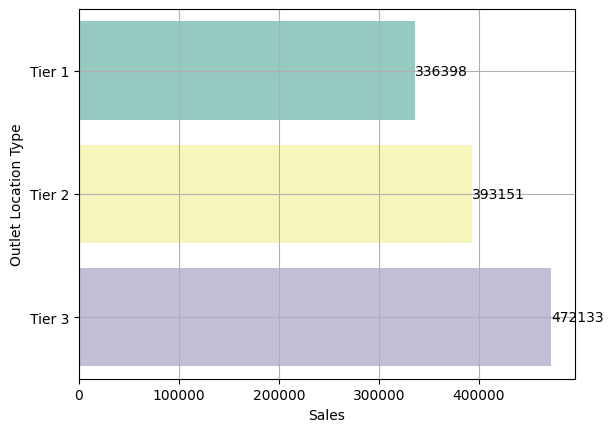

In [55]:
gf=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
ax=sns.barplot(data=gf,y='Outlet Location Type',x='Sales',palette='Set3')
for i in ax.containers:
  ax.bar_label(i)
plt.grid(
)
plt.show()